<a href="https://colab.research.google.com/github/jeonjnh/python_stock_backtest/blob/main/Python_Finance_Monthly_Price_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
from pandas.tseries.offsets import BMonthBegin, BDay
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [2]:
# from Chat GPT
def get_monthly_first_business_day_data(ticker, start_date, end_date):
    try:
        # 애플 주식 데이터 가져오기
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        # 매월 첫 번째 영업일의 날짜 가져오기
        first_business_days = pd.date_range(start=start_date, end=end_date, freq=BMonthBegin())

        # 주식 가격 데이터에서 해당 날짜의 종가 가져오기
        monthly_close_prices = []
        for date in first_business_days:
            # 해당 날짜가 데이터에 있는지 확인
            if date in stock_data.index:
                monthly_close_prices.append(stock_data.loc[date]['Adj Close'])
            else:
                # 데이터에 없는 경우 다음 영업일로 이동
                next_business_day = date + BDay(1)
                while next_business_day not in stock_data.index:
                    next_business_day += BDay(1)
                monthly_close_prices.append(stock_data.loc[next_business_day]['Adj Close'])

        return pd.Series(monthly_close_prices, index=first_business_days)

    except Exception as e:
        print(f"Error fetching data: {e}")
        return pd.Series([])  # 빈 Series를 반환하여 예외 발생 시 빈 데이터를 처리

# 사용 예시
ticker = 'IE00B53SZB19'
start_date = '2021-01-01'
end_date = '2023-12-31'
monthly_invest = 300

monthly_close_prices = get_monthly_first_business_day_data(ticker, start_date, end_date)
"""
if not monthly_close_prices.empty:
    print(monthly_close_prices)
else:
    print("No data available for the specified period.")
"""

[*********************100%%**********************]  1 of 1 completed


'\nif not monthly_close_prices.empty:\n    print(monthly_close_prices)\nelse:\n    print("No data available for the specified period.")\n'

In [3]:
df = pd.DataFrame({'date': monthly_close_prices.index, 'adj_close': monthly_close_prices.values})
df = df.set_index('date')
df['number'] = monthly_invest / df['adj_close']
df['cum_num'] = df['number'].cumsum()
df.head()

,adj_close,number,cum_num
date,,,
2021-01-01,715.700012,0.419170,0.419170
2021-02-01,742.200012,0.404204,0.823374
2021-03-01,743.900024,0.403280,1.226654
2021-04-01,749.400024,0.400320,1.626974
2021-05-03,779.099976,0.385060,2.012034


In [4]:
df['invest'] = range(monthly_invest, monthly_invest *(len(df)+1), monthly_invest)
df['price'] = df['cum_num'] * df['adj_close']
df['ret'] = df['price'] - df['invest']
df.tail()

,adj_close,number,cum_num,invest,price,ret
date,,,,,,
2023-08-01,877.799988,0.341764,12.657656,9600,11110.889845,1510.889845
2023-09-01,879.799988,0.340987,12.998642,9900,11436.205156,1536.205156
2023-10-02,846.599976,0.354359,13.353001,10200,11304.650080,1104.650080
2023-11-01,825.299988,0.363504,13.716505,10500,11320.231327,820.231327
2023-12-01,907.200012,0.330688,14.047193,10800,12743.613414,1943.613414


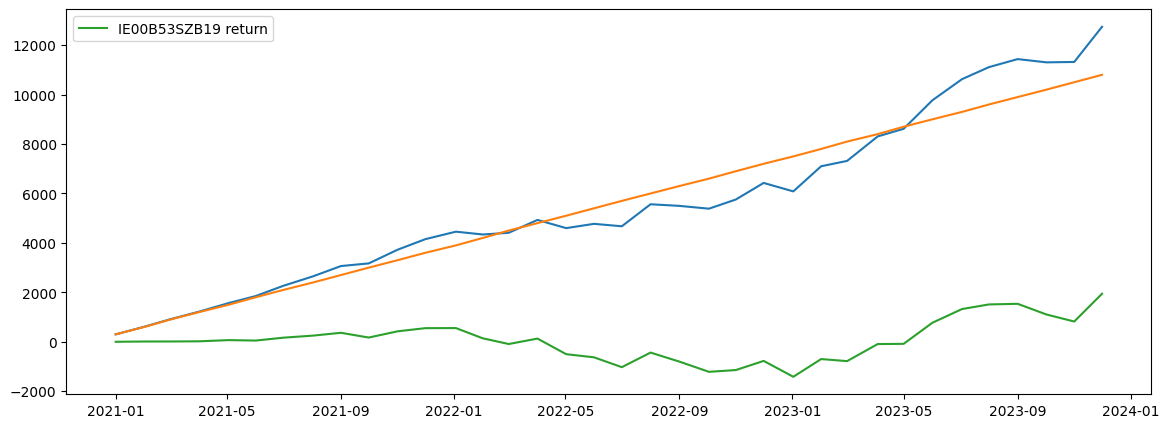

In [5]:
plt.figure(figsize=(14,5))
plt.plot(df.index, df.price)
plt.plot(df.index, df.invest)
plt.plot(df.index, df.ret, label=(ticker+' return'))
plt.legend()
plt.show()

In [ ]:
"""
NASDAQ100 USD (Acc) iShares 876.60 € TER 0.33% : ISIN - IE00B53SZB19
NASDAQ100 EUR (Acc) iShares 10.12 € TER 0.36% : ISIN - IE00BYVQ9F29
Nasdaq-100 EUR (Acc) Amundi 61.86 € TER 0.22% : ISIN - LU1829221024
NASDAQ 100 USD (Acc) Amundi 173.91 € TER 0.23% : ISIN - LU1681038326
NASDAQ 100 EUR (Acc) Amundi 174.20 € TER 0.23% : ISIN - LU1681038243
"""

In [6]:
ticker = ['IE00B53SZB19', 'IE00BYVQ9F29', 'LU1829221024', 'LU1681038326', 'LU1681038243']
start_date = '2015-01-01'
end_date = '2023-12-31'
monthly_invest = 300

df_all = pd.DataFrame()

for t in ticker:
  close_prices = get_monthly_first_business_day_data(t, start_date, end_date)
  if df_all.empty:
    df_all = pd.DataFrame({t: close_prices.values}, index=close_prices.index)
    df_all['invest'] = range(monthly_invest, monthly_invest *(len(df_all)+1), monthly_invest)
  else:
    df_all[t] = close_prices.values

  df_all[t+'_num'] = monthly_invest / df_all[t]
  df_all[t+'_cum_num'] = df_all[t+'_num'].cumsum()
  df_all[t+'_price'] = df_all[t+'_cum_num'] * df_all[t]
  df_all[t+'_ret'] = df_all[t+'_price'] - df_all['invest']

df_all.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,IE00B53SZB19,invest,IE00B53SZB19_num,IE00B53SZB19_cum_num,IE00B53SZB19_price,IE00B53SZB19_ret,IE00BYVQ9F29,IE00BYVQ9F29_num,IE00BYVQ9F29_cum_num,IE00BYVQ9F29_price,...,LU1681038326,LU1681038326_num,LU1681038326_cum_num,LU1681038326_price,LU1681038326_ret,LU1681038243,LU1681038243_num,LU1681038243_cum_num,LU1681038243_price,LU1681038243_ret
2023-08-01,877.799988,31200,0.341764,78.005276,68473.030130,37273.030130,9.611,31.214233,5306.090910,50996.840059,...,177.639999,1.688809,331.028667,58803.932169,27603.932169,162.080002,1.850938,443.696930,71914.399208,40714.399208
2023-09-01,879.799988,31500,0.340987,78.346262,68929.040681,37429.040681,9.450,31.746032,5337.836942,50442.558087,...,175.240005,1.711938,332.740605,58309.465389,26809.465389,162.000000,1.851852,445.548782,72178.902642,40678.902642
2023-10-02,846.599976,31800,0.354359,78.700621,66627.943814,34827.943814,9.050,33.149171,5370.986113,48607.425346,...,168.220001,1.783379,334.523984,56273.624922,24473.624922,160.100006,1.873829,447.422611,71632.362676,39832.362676
2023-11-01,825.299988,32100,0.363504,79.064125,65251.621548,33151.621548,8.826,33.990482,5404.976595,47704.324580,...,164.240005,1.826595,336.350579,55242.220897,23142.220897,155.839996,1.925051,449.347662,70026.337986,37926.337986
2023-12-01,907.200012,32400,0.330688,79.394813,72026.975330,39626.975330,9.654,31.075201,5436.051796,52479.645571,...,180.410004,1.662879,338.013458,60981.009139,28581.009139,165.960007,1.807664,451.155326,74873.740986,42473.740986


In [9]:
df_all.describe()

,IE00B53SZB19,invest,IE00B53SZB19_num,IE00B53SZB19_cum_num,IE00B53SZB19_price,IE00B53SZB19_ret,IE00BYVQ9F29,IE00BYVQ9F29_num,IE00BYVQ9F29_cum_num,IE00BYVQ9F29_price,...,LU1681038326,LU1681038326_num,LU1681038326_cum_num,LU1681038326_price,LU1681038326_ret,LU1681038243,LU1681038243_num,LU1681038243_cum_num,LU1681038243_price,LU1681038243_ret
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,...,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,502.046111,16350.000000,0.735137,49.844597,29505.948955,13155.948955,6.387884,50.333813,3059.020131,21822.546583,...,106.759908,3.129754,196.822265,24116.762927,7766.762927,88.769525,4.177364,283.887300,29866.277918,13516.277918
std,225.560932,9396.275858,0.328424,22.489184,21857.308283,13027.358638,1.814110,12.132056,1620.708026,15858.482355,...,37.548060,0.932947,100.772350,18208.684100,9544.243431,40.660724,1.864896,128.808628,22593.974956,13631.584100
min,225.770004,300.000000,0.323520,1.323393,300.000000,-123.678619,4.227000,28.615032,59.880237,300.000000,...,69.669998,1.633809,4.005340,300.000000,-1110.447781,37.586800,1.807664,7.981526,300.000000,-181.158963
25%,298.507507,8325.000000,0.422186,33.391856,9968.142778,1643.142778,5.010000,37.404156,1661.676571,8325.000000,...,74.900002,2.130451,111.148195,8325.000000,0.000000,54.167749,2.372929,187.065578,10367.395486,1786.448835
50%,429.074997,16350.000000,0.699178,55.121833,23748.108806,7252.808253,5.050000,59.406968,3293.077247,16691.889788,...,84.682499,3.542647,215.547918,18381.161331,1806.216854,75.994999,3.947643,314.976144,23772.536062,7572.536062
75%,710.600021,24375.000000,1.005011,68.898126,50389.756553,24448.834521,8.020500,59.880237,4484.250838,37080.795194,...,140.817505,4.005340,285.179142,41634.190246,15615.664935,126.429998,5.538557,394.588168,53397.992124,25491.752433
max,927.299988,32400.000000,1.328786,79.394813,72026.975330,39626.975330,10.484000,70.972317,5436.051796,52479.645571,...,183.619995,4.306014,338.013458,60981.009139,28581.009139,165.960007,7.981526,451.155326,74873.740986,42473.740986


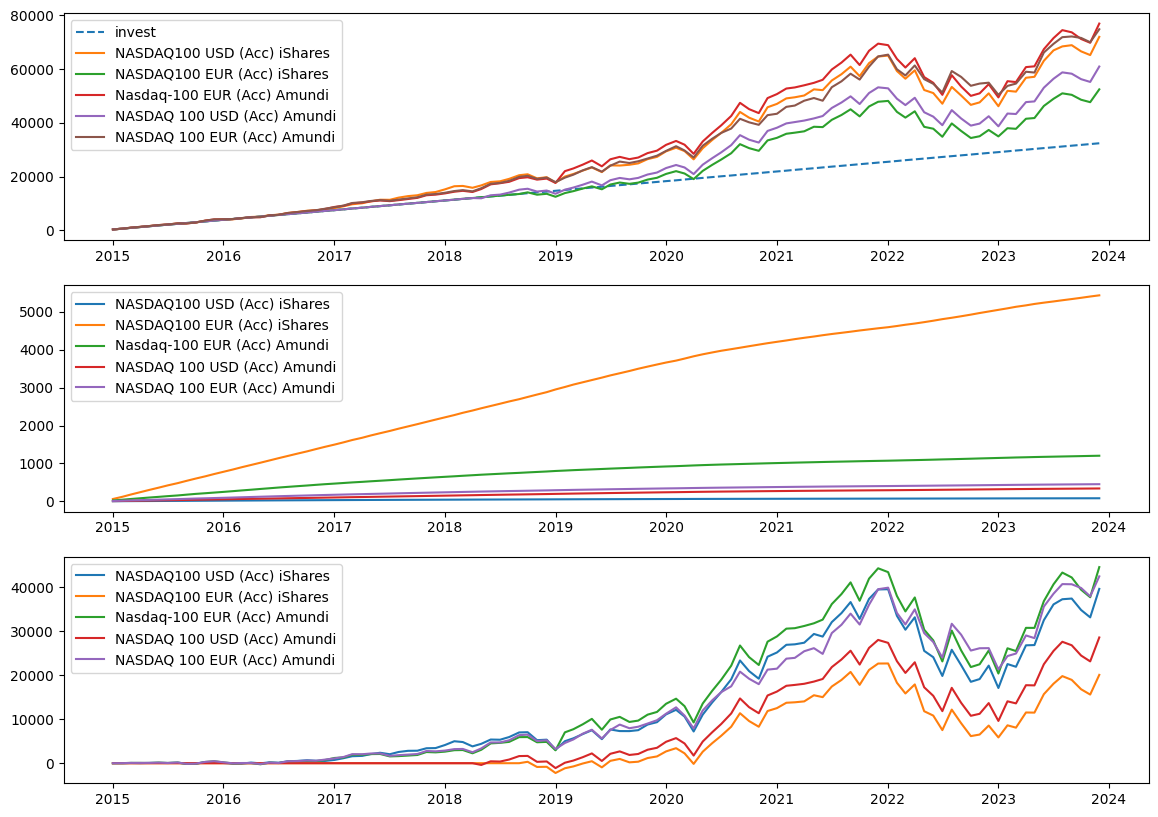

In [12]:
plt.figure(figsize=(14,10))
plt.subplot(311)
plt.plot(df_all.index, df_all.invest,'--', label='invest')
plt.plot(df_all.index, df_all.IE00B53SZB19_price, label='NASDAQ100 USD (Acc) iShares')
plt.plot(df_all.index, df_all.IE00BYVQ9F29_price, label='NASDAQ100 EUR (Acc) iShares')
plt.plot(df_all.index, df_all.LU1829221024_price, label='Nasdaq-100 EUR (Acc) Amundi')
plt.plot(df_all.index, df_all.LU1681038326_price, label='NASDAQ 100 USD (Acc) Amundi')
plt.plot(df_all.index, df_all.LU1681038243_price, label='NASDAQ 100 EUR (Acc) Amundi')
plt.legend()

plt.subplot(312)
plt.plot(df_all.index, df_all.IE00B53SZB19_cum_num, label='NASDAQ100 USD (Acc) iShares')
plt.plot(df_all.index, df_all.IE00BYVQ9F29_cum_num, label='NASDAQ100 EUR (Acc) iShares')
plt.plot(df_all.index, df_all.LU1829221024_cum_num, label='Nasdaq-100 EUR (Acc) Amundi')
plt.plot(df_all.index, df_all.LU1681038326_cum_num, label='NASDAQ 100 USD (Acc) Amundi')
plt.plot(df_all.index, df_all.LU1681038243_cum_num, label='NASDAQ 100 EUR (Acc) Amundi')
plt.legend()

plt.subplot(313)
plt.plot(df_all.index, df_all.IE00B53SZB19_ret, label='NASDAQ100 USD (Acc) iShares')
plt.plot(df_all.index, df_all.IE00BYVQ9F29_ret, label='NASDAQ100 EUR (Acc) iShares')
plt.plot(df_all.index, df_all.LU1829221024_ret, label='Nasdaq-100 EUR (Acc) Amundi')
plt.plot(df_all.index, df_all.LU1681038326_ret, label='NASDAQ 100 USD (Acc) Amundi')
plt.plot(df_all.index, df_all.LU1681038243_ret, label='NASDAQ 100 EUR (Acc) Amundi')

plt.legend()
plt.show()